In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r"C:\Users\mohan\Desktop\EXCEL r assignment\Decision tree\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
y=data["Taxable.Income"]

In [5]:
y.mean()


55208.375

In [6]:
max(y)

99619

In [7]:
min(y)

10003

In [12]:
y_f=pd.cut(y,bins=[0,30000,99620],labels=['Risky','Good'])
y_f.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x14bf6ed0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x14bf6ec2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x14bf6ed0490>],
 'medians': [<matplotlib.lines.Line2D at 0x14bf6681dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14bf6681ac0>],
 'means': []}

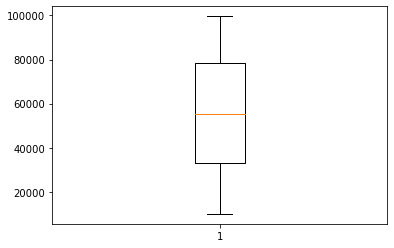

In [15]:
plt.boxplot(y)

In [16]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
 

tax_f= label_encoder.fit_transform(y_f)
 
tax_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [19]:
x=data[['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']]

In [22]:
x1=pd.get_dummies(x)

In [23]:
x1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [26]:
x_f=x1.values
x_f

array([[ 50047,     10,      1, ...,      1,      0,      1],
       [134075,     18,      0, ...,      0,      0,      1],
       [160205,     30,      1, ...,      0,      0,      1],
       ...,
       [154058,      0,      1, ...,      0,      0,      1],
       [180083,     17,      0, ...,      0,      1,      0],
       [158137,     16,      1, ...,      0,      1,      0]], dtype=int64)

In [27]:
y_f=tax_f

In [35]:
x_train, x_test,y_train,y_test = train_test_split(x_f,y_f, test_size=0.3,random_state=4)

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
model.get_n_leaves()

5

In [38]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    171
1      9
dtype: int64

In [39]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,142,9
1,29,0


In [40]:
np.mean(preds==y_test)

0.7888888888888889

In [41]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       171
           1       0.00      0.00      0.00         9

    accuracy                           0.79       180
   macro avg       0.47      0.42      0.44       180
weighted avg       0.89      0.79      0.84       180



[Text(125.55000000000001, 190.26, 'X[1] <= 0.5\nentropy = 0.771\nsamples = 420\nvalue = [325, 95]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(167.4, 135.9, 'X[0] <= 183724.5\nentropy = 0.781\nsamples = 410\nvalue = [315, 95]'),
 Text(83.7, 81.53999999999999, 'X[0] <= 177829.0\nentropy = 0.756\nsamples = 377\nvalue = [295, 82]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.773\nsamples = 361\nvalue = [279, 82]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(251.10000000000002, 81.53999999999999, 'X[6] <= 0.5\nentropy = 0.967\nsamples = 33\nvalue = [20, 13]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.863\nsamples = 28\nvalue = [20, 8]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

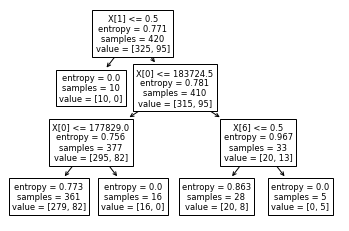

In [43]:
tree.plot_tree(model)